In [16]:
import os
from src import *
from src.data_classes.adult_data import *
from src.data_classes.compas_data import *
from typing import List, Dict
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import seaborn as sns   


In [23]:
palette = sns.color_palette("flare", 6)

palette[1] = palette[3]
palette[2] = palette[5]

palette[3] = palette[0]
palette[4] = palette[1]

palette

[(0.9155979, 0.55210684, 0.42070204),
 (0.69226314, 0.23413578, 0.42480327),
 (0.42355299, 0.16934709, 0.42581586),
 (0.9155979, 0.55210684, 0.42070204),
 (0.69226314, 0.23413578, 0.42480327),
 (0.42355299, 0.16934709, 0.42581586)]

In [24]:
intersection_counts = AdultData().dataset_orig.groupby(['sex',  'race', 'Probability']).size().reset_index(name='count')

# Display the result
print("Intersection Counts:")
print(intersection_counts)

adult_labels = ["Adult sex=0 race=0", "Adult sex=0 race=1", "Adult sex=1 race=0", "Adult sex=1 race=1"]
adult_pos = [151, 1028, 573, 6089]
adult_neg = [1978, 7614, 2043, 13085]

Intersection Counts:
   sex  race  Probability  count
0    0     0            0   1978
1    0     0            1    151
2    0     1            0   7614
3    0     1            1   1028
4    1     0            0   2043
5    1     0            1    573
6    1     1            0  13085
7    1     1            1   6089


In [25]:
intersection_counts = CompasData().dataset_orig.groupby(['sex',  'race', 'Probability']).size().reset_index(name='count')

# Display the result
print("Intersection Counts:")
print(intersection_counts)

compas_labels = ["Compas sex=0 race=0", "Compas sex=0 race=1", "Compas sex=1 race=0", "Compas sex=1 race=1"]
compas_pos = [528, 366, 1938, 1118]
compas_neg = [295, 198, 1979, 763]

Intersection Counts:
   sex  race  Probability  count
0    0     0            0    295
1    0     0            1    528
2    0     1            0    198
3    0     1            1    366
4    1     0            0   1979
5    1     0            1   1938
6    1     1            0    763
7    1     1            1   1118


In [26]:
intersection_counts = DefaultData().dataset_orig.groupby(['sex', 'Probability']).size().reset_index(name='count')

# Display the result
print("Intersection Counts:")
print(intersection_counts)

default_labels = ["Default sex=0", "Default sex=1"]
default_pos = [14349, 9015]
default_neg = [3763, 2873]

Intersection Counts:
   sex  Probability  count
0    0            0   3763
1    0            1  14349
2    1            0   2873
3    1            1   9015


In [27]:
def get_subplots(ax, groups, pos_val, neg_val, label_top=True):
    bars1 = ax.bar(groups, pos_val, label='Positive Labels')
    bars2 = ax.bar(groups, neg_val, bottom=pos_val, label='Negative Labels')

    # Add value labels on each bar
    for bars in zip(bars1, bars2):
        height = 0
        for bar in bars:
            height += bar.get_height()
            if label_top:
                ax.annotate('{}'.format(bar.get_height()),
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3), 
                            textcoords="offset points",
                            ha='center', va='bottom')
            else:
                ax.annotate('{}%'.format(int(bar.get_height()*100)),
                            xy=(bar.get_x() + bar.get_width() / 2, height - ( bar.get_height()/2)),
                            xytext=(0, 3), 
                            textcoords="offset points",
                            ha='center', va='center')

    # Add legend
    ax.set_xticklabels([label.replace(' ', '\n') for label in groups])  # Replace space with newline


In [32]:
size = 4

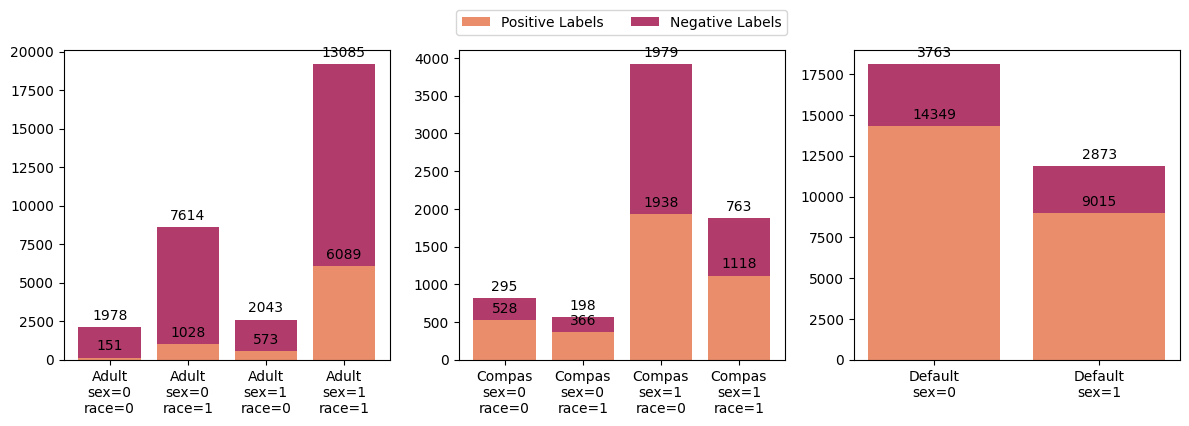

In [52]:


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
fig, axs = plt.subplots(1, 3, figsize=(3*size, size))


get_subplots(axs[0], adult_labels, adult_pos, adult_neg)
get_subplots(axs[1], compas_labels, compas_pos, compas_neg)
get_subplots(axs[2], default_labels, default_pos, default_neg)

plt.tight_layout() 
axs[1].legend(ncol = 2,bbox_to_anchor=(0.5, 1.15), loc='upper center')
plt.savefig('imgs/data_subgroup_sizes.png', bbox_inches='tight')
plt.show()

In [40]:
def get_proportional_subplots(ax, groups, pos_val, neg_val):
    prop_pos_val = []
    prop_neg_val = []
    for p,n in zip(pos_val, neg_val):
        s = p+n
        prop_pos_val.append(p/s)
        prop_neg_val.append(n/s)
    get_subplots(ax, groups, prop_pos_val, prop_neg_val, label_top=False)
    
    mean_pred = sum(pos_val) / sum(pos_val + neg_val)  # Example value for mean pred
    ax.axhline(mean_pred, color = palette[-1], linestyle='--', label='Mean Label')


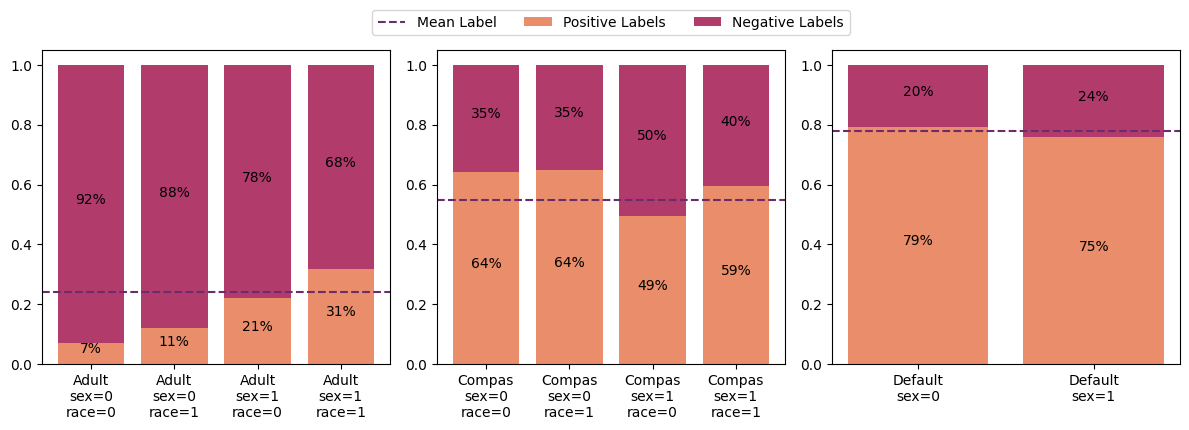

In [51]:


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
fig, axs = plt.subplots(1, 3, figsize=(3*size, size))


get_proportional_subplots(axs[0], adult_labels, adult_pos, adult_neg)
get_proportional_subplots(axs[1], compas_labels, compas_pos, compas_neg)
get_proportional_subplots(axs[2], default_labels, default_pos, default_neg)

plt.tight_layout() 
axs[1].legend(ncol = 3,bbox_to_anchor=(0.5, 1.15), loc='upper center')


plt.savefig('imgs/data_subgroup_labels.png', bbox_inches='tight')

plt.show()